In [1]:
!pip install kaggle

In [0]:
from getpass import getpass
import os
user = 'ahmadelsallab'
key = '6b7ffe97ff5bc0656e325b746b72fa31'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c ashrae-energy-prediction

weather_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
building_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip train.csv.zip
!unzip weather_train.csv.zip
!unzip building_metadata.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  weather_train.csv.zip
replace weather_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
unzip:  cannot find or open building_metadata.csv.zip, building_metadata.csv.zip.zip or building_metadata.csv.zip.ZIP.


In [0]:
import pandas as pd
train_df = pd.merge(pd.merge(pd.read_csv('train.csv'), pd.read_csv('building_metadata.csv'), on='building_id', how='left'), pd.read_csv('weather_train.csv'), on=['timestamp','site_id'], how='left')



In [0]:
import numpy as np

train_df.meter_reading = train_df.meter_reading.apply(np.log1p)


In [0]:
meters_types_data_dict = dict(list(train_df.groupby('meter')))


# Distribution per meter id among time stamps

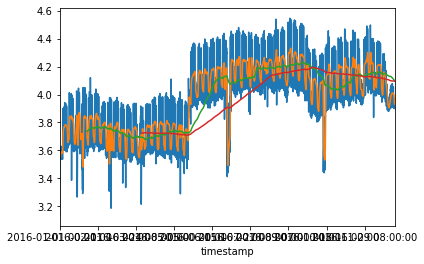

In [11]:
# Electricity pattern
avg_reading_per_hour = meters_types_data_dict[0].groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely

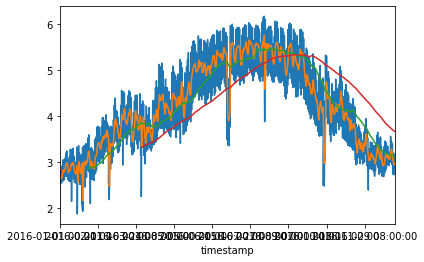

In [12]:
# chilledwater pattern
avg_reading_per_hour = meters_types_data_dict[1].groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely

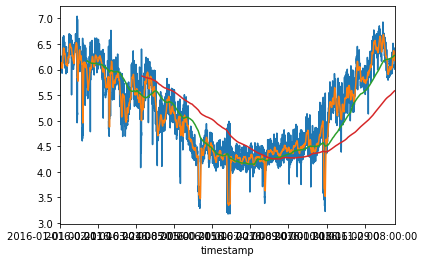

In [13]:
# steam pattern
avg_reading_per_hour = meters_types_data_dict[2].groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely

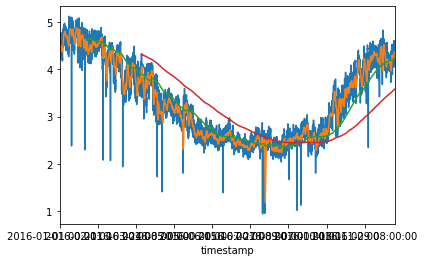

In [14]:
# hotwater pattern
avg_reading_per_hour = meters_types_data_dict[3].groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely

In [0]:
del(avg_reading_per_hour)

As expected, the pattern increases mostly around the end of the year (Autumn and Winter), and the start of the year. The exception is the steam pattern. The daily patterns peaks around the weakend.

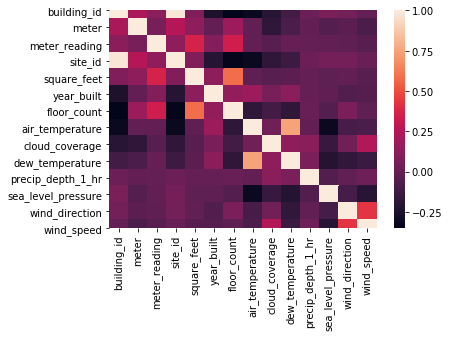

In [16]:
import seaborn as sns

sns.heatmap(train_df.corr(), 
            xticklabels=train_df.corr().columns.values,
            yticklabels=train_df.corr().columns.values)


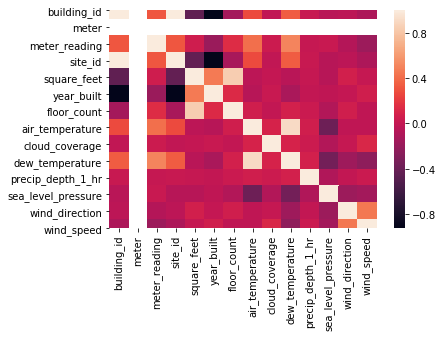

In [17]:


sns.heatmap(meters_types_data_dict[0].groupby('timestamp').mean().corr(), 
            xticklabels=meters_types_data_dict[0].groupby('timestamp').mean().corr().columns.values,
            yticklabels=meters_types_data_dict[0].groupby('timestamp').mean().corr().columns.values)

See how the meter column is insignificant now, since we already filter on it.

Now the meter reading has high correlation with dew and air temp. Which is clear also in the season dist. above.

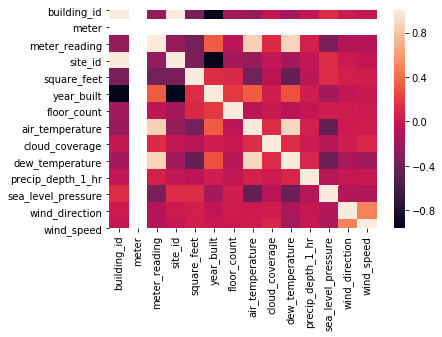

In [18]:

sns.heatmap(meters_types_data_dict[1].groupby('timestamp').mean().corr() , 
            xticklabels=meters_types_data_dict[1].groupby('timestamp').mean().corr().columns.values,
            yticklabels=meters_types_data_dict[1].groupby('timestamp').mean().corr().columns.values)

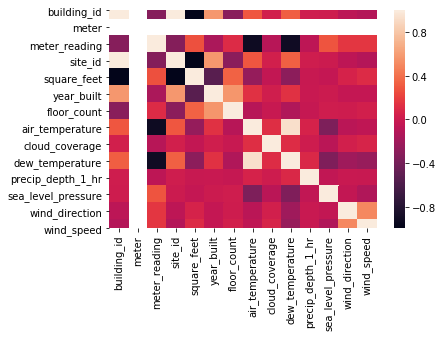

In [19]:

sns.heatmap(meters_types_data_dict[2].groupby('timestamp').mean().corr(), 
            xticklabels=meters_types_data_dict[1].groupby('timestamp').mean().corr().columns.values,
            yticklabels=meters_types_data_dict[1].groupby('timestamp').mean().corr().columns.values)

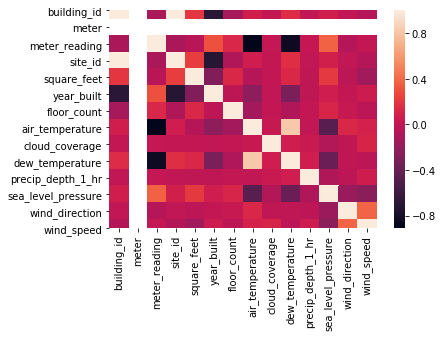

In [20]:

sns.heatmap(meters_types_data_dict[3].groupby('timestamp').mean().corr(), 
            xticklabels=meters_types_data_dict[1].groupby('timestamp').mean().corr().columns.values,
            yticklabels=meters_types_data_dict[1].groupby('timestamp').mean().corr().columns.values)

# Filter by building_id

Let's do it for electricity meters

In [0]:
#meters_types_data_dict[0].groupby('building_id')

In [22]:
elec_per_building = meters_types_data_dict[0].groupby('building_id')
elec_per_building.mean()

,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
building_id,,,,,,,,,,,,,
0,0,3.356302,0,7432,2008.0,NaN,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114
1,0,2.990028,0,2720,2004.0,NaN,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114
2,0,1.851904,0,5376,1991.0,NaN,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114
3,0,3.626757,0,23685,2002.0,NaN,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114
4,0,4.546479,0,116607,1975.0,NaN,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0,2.027276,15,19619,1914.0,NaN,10.827860,1.110957,5.591969,3.896241,1017.082656,182.651210,3.507032
1445,0,1.719585,15,4298,NaN,NaN,10.800895,1.110588,5.572797,3.891648,1017.094301,182.649683,3.509021
1446,0,0.961074,15,11265,1997.0,NaN,10.839521,1.115438,5.602245,3.896241,1017.093049,182.701578,3.508321


In [0]:
building = 50 # Random choice
for name, group in elec_per_building:
  if name==building:
    break

In [24]:
group

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
48,50,0,2016-01-01 00:00:00,0.000000,0,Other,4698,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2349,50,0,2016-01-01 01:00:00,0.000000,0,Other,4698,1981.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
4642,50,0,2016-01-01 02:00:00,0.000000,0,Other,4698,1981.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
6941,50,0,2016-01-01 03:00:00,0.000000,0,Other,4698,1981.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
9237,50,0,2016-01-01 04:00:00,0.000000,0,Other,4698,1981.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20204334,50,0,2016-12-31 19:00:00,3.828222,0,Other,4698,1981.0,NaN,22.8,NaN,10.0,0.0,1021.7,140.0,5.7
20206697,50,0,2016-12-31 20:00:00,3.829706,0,Other,4698,1981.0,NaN,23.3,NaN,8.9,0.0,1021.0,170.0,4.1
20209063,50,0,2016-12-31 21:00:00,3.838559,0,Other,4698,1981.0,NaN,23.3,NaN,10.0,0.0,1021.1,150.0,4.1
20211428,50,0,2016-12-31 22:00:00,3.813267,0,Other,4698,1981.0,NaN,22.8,NaN,10.0,0.0,1021.1,160.0,3.1


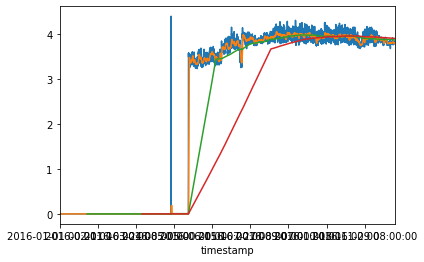

In [25]:
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely

In [0]:
del(avg_reading_per_hour)
del(elec_per_building)

Let's do it for chilledwater

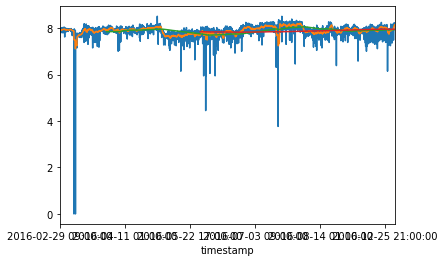

In [40]:

building = 50 # Random choice
for name, group in meters_types_data_dict[1].groupby('building_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour)    

Let's do it for steam

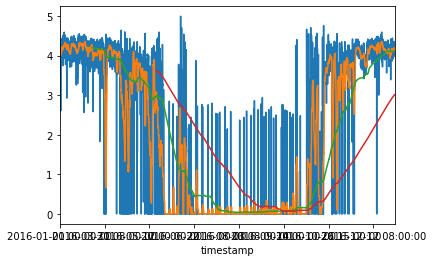

In [41]:
building = 50 # Random choice
for name, group in meters_types_data_dict[2].groupby('building_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour) 

Let's do it for hotwater

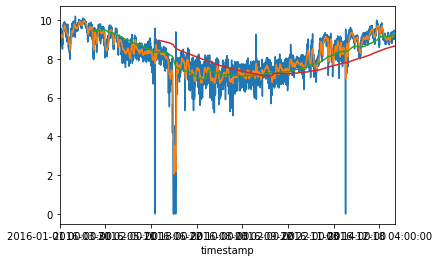

In [44]:
building = 400 # Random choice
for name, group in meters_types_data_dict[3].groupby('building_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour) 

It seems the pattern over all buildings is mostly preserved per building

# Filter per site

Electricity

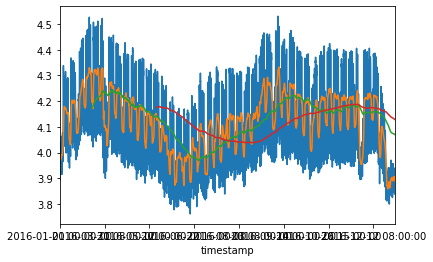

In [49]:
site = 0 # Random choice
for name, group in meters_types_data_dict[0].groupby('site_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour) 

chilledwater

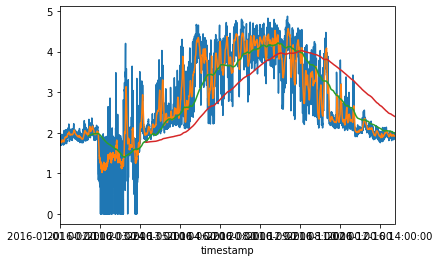

In [50]:
site = 5 # Random choice
for name, group in meters_types_data_dict[1].groupby('site_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour) 

steam

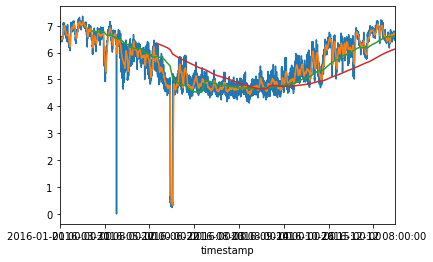

In [51]:
site = 15 # Random choice
for name, group in meters_types_data_dict[2].groupby('site_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour)

hotwater

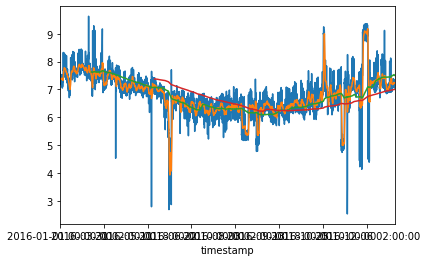

In [52]:
site = 7 # Random choice
for name, group in meters_types_data_dict[3].groupby('site_id'):
  if name==building:
    break
avg_reading_per_hour = group.groupby('timestamp').mean().meter_reading
avg_reading_per_hour.plot() # Hourly
avg_reading_per_hour.rolling(24).mean().plot() # Daily
avg_reading_per_hour.rolling(24*30).mean().plot() # Monthly
avg_reading_per_hour.rolling(24*30*3).mean().plot() # Quartely
del(avg_reading_per_hour)

Again the patters are more preserved and consistent over sites.

# Scatter of temp per timestamps


In [0]:
time2idx = dict(zip(meters_types_data_dict[0].timestamp.unique(), np.arange(len(meters_types_data_dict[0].timestamp.unique()))))


In [0]:
map_time2idx = lambda x:time2idx[x]

In [73]:
map_time2idx('2016-02-09 11:00:00')

947

In [0]:
meters_types_data_dict[0]['timeidx'] = meters_types_data_dict[0].timestamp.apply(map_time2idx)

In [79]:
meters_types_data_dict[0].columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'timeidx'],
      dtype='object')

In [0]:
meters_types_data_dict[0].plot.scatter(x='timeidx', y='air_temperature')

# Tables joining --> train_df

## Ensure no missing keys:
- train: timestamp, building_id --> building_meta: building_id | site_id --> weather(site_id, timestamp). Checks:

1. train(timestamps) <> weather(timestamps)
2. train(building_id) <> building_meta(building_id)
3. building(train(building_id) | site_id) <> weather(site_id)

# EDA:

# Hist

# Skew?

# Target var: skew?
- Log1p + 1

# Correlation to target var



# Types: Categorical | Numerical | Ordinal | Nominal

# Missing vals
# Missing vals handling

# Outliers 

# Data prep:
## Types encoding


# Modeling
# Derived featues:
- Season: Winter|Autumn|Summer|Spring
- Weakend: Y|N
- Holiday: Y|N
- Time-of-day: day|night --> Morning|Afternoon|Evening|Night
## Featues: Xgboost:
1. Individula
2. Additive
3. Ablation

## Model:
Regression:

- xgboost
- DT
- Adaboost
- Lgbm
